<a href="https://colab.research.google.com/github/carson-edmonds/AAI-521-Sports-Image-Classification/blob/main/SundayLatestVersion-Trainable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Pre-processing

In [2]:
!pip install -q kaggle
!pip install -q patool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.7/93.7 kB 1.2 MB/s eta 0:00:00


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import requests
from PIL import Image
from io import BytesIO
import random
import pickle
from sklearn.model_selection import train_test_split
import patoolib

# Data visualization
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf

# Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Scaling data
from sklearn.preprocessing import StandardScaler
# Classification Report
from sklearn.metrics import classification_report
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from google.colab import files

In [ ]:
# get api key from kaggle
# upload kaggle.json that was generated from kaggle
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d rishikeshkonapure/sports-image-dataset/
! mkdir kaggle_data
! unzip /content/sports-image-dataset.zip -d kaggle_data

In [6]:
data_dir = '/content/kaggle_data/data'
categories = ["badminton", "baseball", "basketball", "boxing",
                "chess", "cricket", "fencing", "football", "formula1",
                "gymnastics", "hockey", "ice_hockey", "kabaddi", "motogp",
                "shooting", "swimming", "table_tennis", "tennis", "volleyball",
                "weight_lifting", "wrestling", "wwe"]

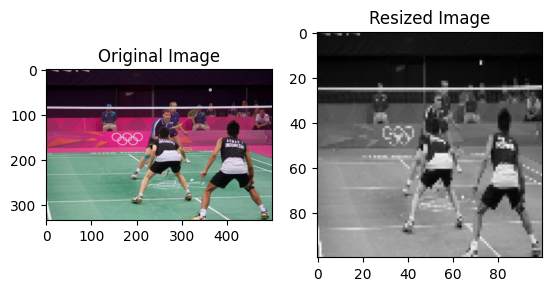

In [7]:
# Display the original and resized images for the first row
plt.subplot(1, 2, 1)
plt.imshow(covert_to_rgb(df['img_raw'][0]))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(resized_img_grey[0], cmap='gray')
plt.title('Resized Image')

plt.show()

In [3]:
#create training data
training_data_raw = []
img_size = 100

def create_training_data():
    for i in categories:

        path = os.path.join(data_dir,i) #create path to sports types
        class_num = categories.index(i) #get the classification (indexing each category)
        for img in os.listdir(path):
            try:
                # Read original images
                img_raw = cv2.imread(os.path.join(path,img))
                img_raw_resized = cv2.resize(img_raw,(img_size,img_size))
                training_data_raw.append([img_raw_resized,class_num])

                # Read images as grayscale
                img_gray = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                img_gray_resized = cv2.resize(img_gray,(img_size,img_size))
                training_data_gray.append([img_gray_resized,class_num])

            except Exception as e:
                pass
    # return (img_raw, img_raw_resized, class_num), (img_gray, img_gray_resized, class_num)

create_training_data()
print("training data size", len(training_data_raw))

training data size 14271


In [ ]:
#shuffle all the training data
random.shuffle(training_data_gray)
for sample in training_data_gray[:2]:
    print(sample) #print first 5

In [ ]:
#creating lable and features - for color

x=[] #features
y=[] #label
#y = np.array(y)

for features,label in training_data_raw:
    x.append(features)
    y.append(label)
    np.array((y, label))

print("Before converting into numpy array:")
x = np.array(x).reshape(-1,img_size,img_size,1)
y = np.array(y)


# normalize inputs from 0-255 to 0-1
x = x/255.0

<ipython-input-6-e06565115dbb>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array((y, label))


Before converting into numpy array:


In [ ]:
#creating lable and features - for gray

x_gray=[] #features
y_gray=[] #label
#y = np.array(y)

for features,label in training_data_gray:
    x_gray.append(features)
    y_gray.append(label)
    np.array((y_gray, label))

print("Before converting into numpy array:")
print("X gray (img)", x_gray[0])
print("Y gray (category)", y_gray[0])
x_gray = np.array(x_gray).reshape(-1,img_size,img_size,1)
y_gray = np.array(y_gray)


# normalize inputs from 0-255 to 0-1
x_gray = x_gray/255.0

print("After Normalizing and converting into numpy array:")
print("X shape", x_gray.shape)
print("Y shape", y_gray.shape)

## Train Test Split

In [ ]:
#create a split of data for the model fit and training
# train_x,test_x, train_y,test_y = train_test_split(x,y,test_size=0.2)

train_x_gray,test_x_gray, train_y_gray,test_y_gray = train_test_split(x_gray,y_gray,test_size=0.2)

print(type(train_x_gray))
print(type(test_x_gray))
print(train_x_gray.shape)
print(test_x_gray.shape)

In [ ]:
test_y_cat = to_categorical(test_y)
train_y_cat = to_categorical(train_y)
print("one hot encoded for categorial")
print(train_y_cat[1])
print(len(train_y_cat[0]))

##Object Detection

In [7]:
#Clone yolo 8 and check all dependencies
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.225 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.9/78.2 GB disk)


In [ ]:
#Train YOLO8 model
from ultralytics import YOLO
model = YOLO("yolov8n.yaml")
model = YOLO("yolov8n.pt")
model.train(data="coco128.yaml", epochs=3, verbose=False)

In [9]:
#Test model on images from test dataset
from IPython.display import Image
metrics = model.val()

Ultralytics YOLOv8.0.225 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.13it/s]


                   all        128        929      0.665      0.546      0.625      0.463
Speed: 0.4ms preprocess, 13.5ms inference, 0.0ms loss, 6.4ms postprocess per image
Results saved to runs/detect/train2


In [10]:
def obj_det(image_path):
  results = model(source=image_path,save=True, save_txt=True, project='runs/detect', name='predict', exist_ok=True)
  N = 12
  img_numb = image_path[-N:]
  return Image(filename='/content/runs/detect/predict/'+img_numb,width=600)

Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels


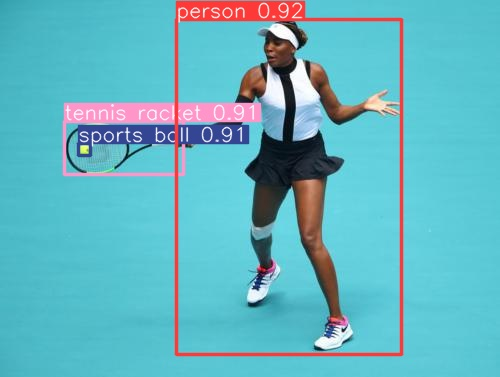

In [11]:
obj_det('/content/kaggle_data/data/tennis/00000007.jpg')

Results saved to runs/detect/predict
2 labels saved to runs/detect/predict/labels


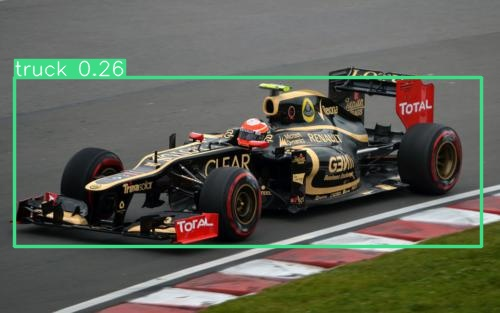

In [12]:
obj_det('/content/kaggle_data/data/formula1/00000023.jpg')

Results saved to runs/detect/predict
3 labels saved to runs/detect/predict/labels


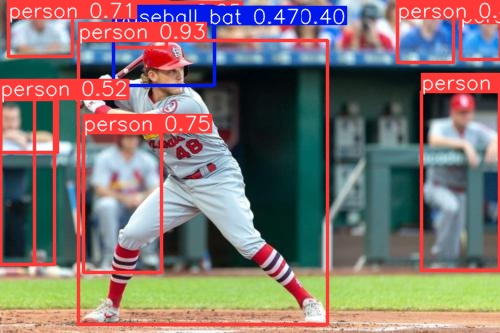

In [13]:
obj_det('/content/kaggle_data/data/baseball/00000028.jpg')

Results saved to runs/detect/predict
4 labels saved to runs/detect/predict/labels


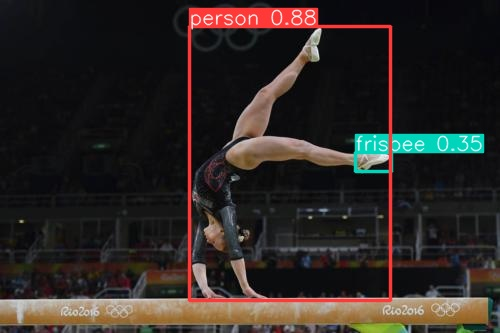

In [14]:
obj_det('/content/kaggle_data/data/gymnastics/00000055.jpg')

##Building Classification model

Resnet does get rescaled 1/255

efficientNet does not require image rescale

ResNet50 works best with input images of 224 x 224

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                                labels='inferred',
                                                                image_size=IMAGE_SIZE,
                                                                validation_split=0.2,
                                                                label_mode= 'categorical',
                                                                subset="both",
                                                                batch_size=BATCH_SIZE,
                                                                #  color_mode="grayscale"
                                                                seed=58)

print(type(train_ds))
print(train_ds.take(1))
categories = train_ds.class_names

Found 14184 files belonging to 22 classes.
Using 11348 files for training.
Using 2836 files for validation.
<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 22), dtype=tf.float32, name=None))>


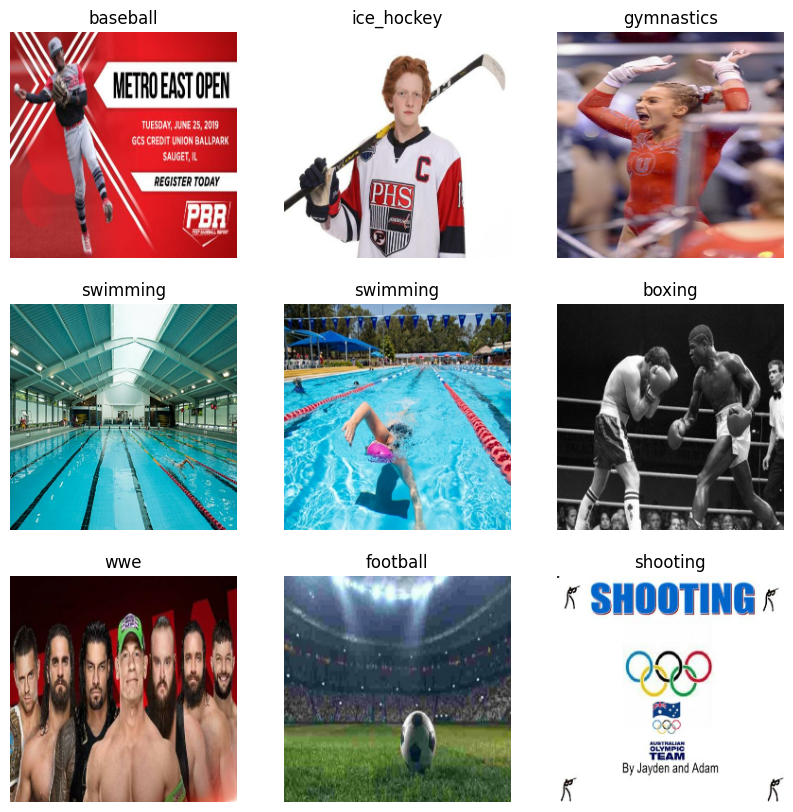

In [15]:
def display_img(train_ds):
  class_names = train_ds.class_names
  plt.figure(figsize=(10, 10))
  for images, labels in train_ds.take(2):
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      image_np = np.array(images[i], dtype=np.float32) / 255.0 # converting to numpy and scaling values
      plt.imshow(image_np)   # Needed to use a converted image
      label_index = tf.argmax(labels[i]).numpy()
      plt.title(class_names[label_index])
      plt.axis("off")

display_img(train_ds)

In [27]:
print("DS Element \n", train_ds.take(1))

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

DS Element 
 <_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 22), dtype=tf.float32, name=None))>
(32, 224, 224, 3)
(32, 22)


In [29]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [66]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"
import tensorflow_hub as hub
from tensorflow.keras import layers


def create_model(model_url, num_classes=len(categories)):
  """
  Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """

  rescaling_layer = layers.Rescaling(1./255, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=True, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=(224,224,3)) # define the input image shape

  # Create our own model
  model = tf.keras.Sequential([
    rescaling_layer,
    feature_extractor_layer, # use the feature extraction layer as the
    layers.Dense(128, activation= 'relu'),
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer
  ])

  return model

In [68]:
# Create model
resnet_model = create_model(resnet_url)

# Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

# Fit the model
resnet_history = resnet_model.fit(train_ds,
                                  epochs=5,
                                  steps_per_epoch=len(train_ds),
                                  validation_data=val_ds,
                                  validation_steps=len(val_ds))

Epoch 1/5
355/355 [==============================] - 44s 114ms/step - loss: 0.8899 - accuracy: 0.7391 - val_loss: 0.6952 - val_accuracy: 0.7941
Epoch 2/5
355/355 [==============================] - 39s 110ms/step - loss: 0.3931 - accuracy: 0.8792 - val_loss: 0.6576 - val_accuracy: 0.8114
Epoch 3/5
355/355 [==============================] - 39s 110ms/step - loss: 0.2390 - accuracy: 0.9287 - val_loss: 0.6747 - val_accuracy: 0.8117
Epoch 4/5
355/355 [==============================] - 42s 117ms/step - loss: 0.1402 - accuracy: 0.9614 - val_loss: 0.6877 - val_accuracy: 0.8205
Epoch 5/5
355/355 [==============================] - 39s 110ms/step - loss: 0.0896 - accuracy: 0.9787 - val_loss: 0.7011 - val_accuracy: 0.8300


In [69]:
resnet_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_34 (Rescaling)    (None, 224, 224, 3)       0         
                                                                 
 feature_extraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 dense_3 (Dense)             (None, 128)               262272    
                                                                 
 output_layer (Dense)        (None, 22)                2838      
                                                                 
Total params: 23829910 (90.90 MB)
Trainable params: 265110 (1.01 MB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [ ]:
model.save('model_resnet_v2_50.h5')

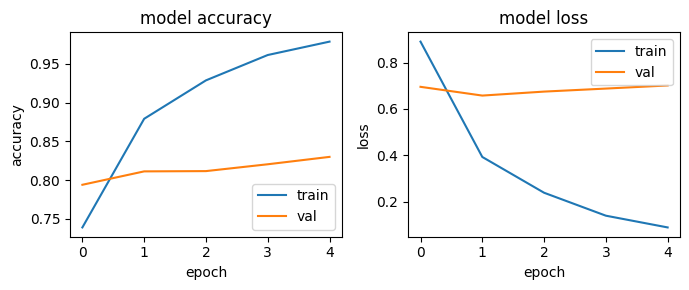

In [72]:
# Draw Learning curve
def learning_curve(hist):
  #Create a function to draw learning curves
  # This will help you to just call this function in future for drawing the learning curves
  plt.figure(figsize=(7, 3))
  plt.subplot(1,2,1)
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='lower right')

  plt.subplot(1,2,2)
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper right')
  plt.tight_layout()
learning_curve(resnet_history)

In [73]:
# Retrieve an Image
index = 10
image_batch, label_batch = next(iter(val_ds.shuffle(buffer_size=BATCH_SIZE).take(index)))
print("image shape", image_batch.shape)
image = image_batch[0].numpy()
print("label", label_batch[0].numpy())
# true_label = categories[np.argmax(label_batch[0].numpy())]
true_label_index = np.argmax(label_batch[0].numpy())
true_label = categories[true_label_index]

# Preprocess the Image
# preprocessed_image = rescaling_layer(image.reshape(1, 240, 240, 3))
preprocessed_image = layers.Rescaling(1./255)(image.reshape(1, 224, 224, 3))

# Make Prediction
predictions = resnet_model.predict(preprocessed_image)
print(predictions.shape)
print(predictions)

# Post-process Predictions
predicted_label_index = np.argmax(predictions)
print("label index", predicted_label_index)
predicted_label = categories[predicted_label_index]
# predicted_label = categories[np.argmax(predictions)]

print("True Label:", true_label)
print("Predicted Label:", predicted_label)

image shape (32, 224, 224, 3)
label [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 35ms/step
(1, 22)
[[2.34139953e-02 2.54891976e-03 1.20887056e-03 7.79413269e-04
  5.16916625e-03 5.80184860e-03 6.17309749e-01 1.29323043e-02
  2.02220567e-02 2.14016791e-02 3.82339619e-02 1.45165157e-03
  5.61913615e-03 8.10354576e-03 2.23331829e-03 1.25953276e-03
  1.01447694e-01 7.74218980e-03 5.65083406e-04 1.20674714e-01
  1.27478025e-03 6.06427027e-04]]
label index 6
True Label: basketball
Predicted Label: fencing


In [ ]:
from sklearn.metrics import classification_report

## Save with Pickle

In [ ]:
#Optional Save the x and y

In [ ]:
#dumping data into pickle file
#x_location = '/content/drive/MyDrive/Final_Project_AAI_521/data/x.pickle'
#y_location = '/content/drive/MyDrive/Final_Project_AAI_521/data/y.pickle'

#pickle file for features
#pickle_out = open(x_location,"wb") #path to save pickle file
#pickle.dump(x,pickle_out)
#pickle_out.close()

#pickle file for label
#pickle_out = open(y_location,"wb") #path to save pickle file
#pickle.dump(y,pickle_out)
#pickle_out.close()

In [ ]:
#importing data (pickle) files x and y
#pickle_in = open(x_location,"rb")   #rb - read binary form #wb - Write binary form
#x = pickle.load(pickle_in)


#pickle_in = open(y_location,"rb")   #rb - read binary form #wb - Write binary form
#y = pickle.load(pickle_in)